In [1]:
import os
import sys
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
# =================================
# Add the parent directory to the Python path
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()
sys.path.append(parent_dir)
# =================================

from ML_toolbox.d_PCA import MyPCA

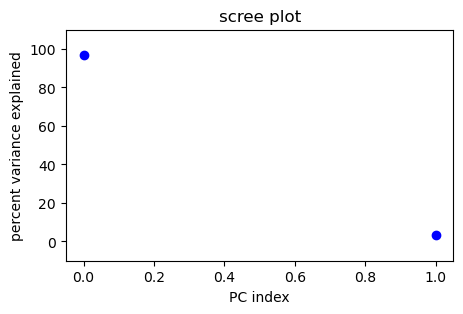

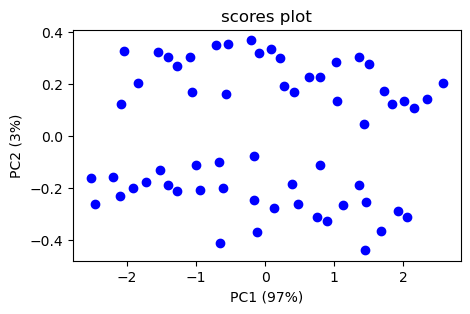

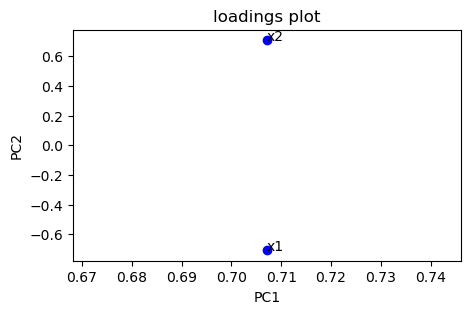

In [4]:
in_file_name = 'Homework_2_dataset_prob3.csv'

current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
in_file_full_name = os.path.join(root_dir, 'data', in_file_name)

data_in_df = pd.read_csv(in_file_full_name, header=0)
data_for_analysis = data_in_df.copy()

num_of_samples = data_for_analysis.shape[0]
num_of_variables = data_for_analysis.shape[1]

# standardize the data
data_standardized = StandardScaler().fit_transform(data_for_analysis)

my_pca_obj = MyPCA(n_components=min(num_of_samples, num_of_variables))
pca_results = my_pca_obj.fit_transform(data_standardized)
my_pca_obj.plot_results()

Plot the scores plot: See above

Question: Do you see a clear separation of the raw data?
Answer: I do see a clear separation of the raw data in the scores plot along PC2, but NOT along PC1.

Question: Can you still separate them after you project your raw data onto your first principal components?
Answer: NO.

In [5]:
# Questions: What is the variance of the projections on PC1 and PC2? 97% and 3% on PC1 and PC2, respectively.
print('pca_results keys:')
print(pca_results.keys())
print()

scores = pca_results['scores']
# variance of the projection onto PC1
print('PCA scores variances:')
print(np.cov(scores.T))

pca_results keys:
dict_keys(['data_for_pca', 'eigenvalues', 'percent_variance_explained', 'loadings', 'scores'])

PCA scores variances:
[[1.97071434e+00 4.19626770e-17]
 [4.19626770e-17 6.31839622e-02]]


Questions: What is the variance of the projections on PC1 and PC2? 97% and 3% on PC1 and PC2, respectively.

Answer: The variance of the projections on PC1 is 1.97 and the variance of the projections on PC2 is 0.063, as shown above.

In [6]:
# What is the relationship between these variances and the eigenvalues of your covariance matrix?

# The eigenvalues of the covariance matrix is:

print(pca_results['eigenvalues'])

[1.97071434 0.06318396]


Question: What is the relationship between these variances and the eigenvalues of your covariance matrix?

Answer: The eigenvalues are 1.97 and 0.063 for PC1 and PC2, respectively. There are equal to the variance of the projections onto PC1 and PC2, respectively.

Text(0, 0.5, 'PC 2 (3.0%)')

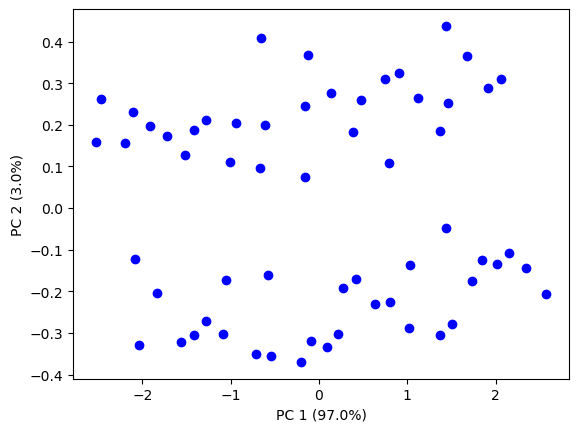

In [7]:
# verify the results by conducting PCA using sklearn PCA
sklearn_pca_obj = PCA(n_components=min(num_of_samples, num_of_variables))
sklearn_pca_obj.fit(data_standardized)
sklearn_pca_scores = sklearn_pca_obj.fit_transform(data_standardized)

fig, ax = plt.subplots()
ax.scatter(sklearn_pca_scores[:, 0], sklearn_pca_scores[:, 1], c='blue')
pc1_percentage = round(sklearn_pca_obj.explained_variance_ratio_[0] * 100, 0)
pc2_percentage = round(sklearn_pca_obj.explained_variance_ratio_[1] * 100, 0)
ax.set_xlabel(f'PC 1 ({pc1_percentage}%)')
ax.set_ylabel(f'PC 2 ({pc2_percentage}%)')